Estatística descritiva - Exercício
==================================
<h2>Discentes: Eric Leandro e José David<h2>


## Objetivo



Faça uma análise exploratória do conjunto de dados que você recebeu. Para isso, compute estatísticas descritivas dos dados e escolha algumas variáveis para representar graficamente. Com as informações obtidas, escreva um texto sobre o que observou.



<h2>Métodos:</h2>
</br1>

Inicialmente, as bibliotecas necessárias foram importadas e tiveram suas abreviações definidas.

In [104]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt 
import math

Uma função para conta a quantidades de valores repetidos na coluna de dados é feita plotagem dos histogramas. O uso da biblioteca bokeh é feito para melhorar a qualidade estética dos histogramas.<sup>[1][2]</sup>

In [105]:
'''FUNÇÕES'''

def grafico_barras(X, Y, titulo, X_Y, LEGENDAS_COLORS = [], LEGENDAS = [], COLORS = '#804a81', LG = False):
    from bokeh.plotting import figure, show
    from bokeh.io import output_notebook
    from bokeh.models import LabelSet
    from bokeh.models import Legend, LegendItem
    from bokeh.layouts import row
    from bokeh.models.annotations import LegendItem as BokehLegendItem
    from bokeh.models.ranges import FactorRange
    
    output_notebook()

    # Criar figura
    p = figure(x_range=X, title=titulo, x_axis_label=X_Y[0], y_axis_label=X_Y[1])
    
    if LG:
        # Criar a legenda
        legend = Legend(items=[])

        # Adicionar cada item da legenda com retângulo de cor
        for legend_label, color in zip(LEGENDAS, LEGENDAS_COLORS):
            # Criar o retângulo de cor
            rect = p.rect(x=0, y=0, fill_color=color, line_color=None)
            # Criar o item da legenda com o retângulo de cor e o rótulo
            legend_item = BokehLegendItem(label=legend_label, renderers=[rect])
            # Adicionar o LegendItem à legenda
            legend.items.append(legend_item)

        # Adicionar a legenda ao gráfico
        p.add_layout(legend, 'center')

    # Adicionar o gráfico de barras
    p.vbar(x=X, top=Y, width=0.5, color=COLORS)
    
    p.xaxis.major_label_orientation = 0.8  # Rotacionar os rótulos em um ângulo específico (em radianos)

    # Exibir o gráfico
    show(p)
    
    return

def contar_itens(lista):
    # Inicializar as listas que serão usadas
    contagem = []
    repeticoes = []
    Xs = []

    # Percorrer a lista e contar os caracteres
    for item in lista:
        if item not in contagem:
            contagem.append(item)

    contagem_ordenada = sorted(contagem)

    for item in contagem_ordenada:
        a = 0
        for valor in lista:
            if valor == item:
                a = a + 1
        repeticoes.append(a)
    
    # Tranforma os valores númericos em char
    for item in contagem_ordenada:
        Xs.append(str(item))
        
    return Xs, repeticoes

Para evitar o uso de longas strings escritas ao longo do código, as perguntas referentes a cada coluna são simplificadas em variáveis com menos caracteres.

In [106]:
Tabela = pd.read_excel("questionario.xlsx")


#Dados quantitativos
alturas = "Qual é a sua altura em centímetros?\n"
tamanhos_sapato = "Qual é o número de sapato que você calça?\n"
n_irmaos = "Quantos irmãos você tem?\n"
aniversarios = "Qual o mês do seu aniversário?\n"
livros_ano_passado = "Quantos livros você leu ano passado?\n"

#Dados qualitativos ordinários:
opinioes_azeitona = "Qual a sua opinião sobre azeitona?\n"

#Dados qualitativos nominais:
cores = "Das cores abaixo, qual é a sua favorita (ou a cor que mais gosta se sua cor favorita mesmo não estiver na lista)?\n"
afinidades = "Qual destas linhas de estudo é a que você tem mais afinidade?\n"
desafinidades = "Qual destas linhas de estudo é a que você tem menos afinidade?\n"
cats_dogs = "Cachorros ou gatos?\n"

Com uso da função criada, os histogramas referentes aos dados quantitativos podem ser plotados.

In [107]:
X, Y = contar_itens(Tabela[alturas])

grafico_barras(X, Y, "Alturas", ['Altura', 'Quantidade de pessoas'])

Loading BokehJS ...

In [108]:
X, Y = contar_itens(Tabela[tamanhos_sapato])

grafico_barras(X, Y, "Tamanho dos sapatos", ['Tamanho dos sapatos', 'Quantidade de pessoas'])

Loading BokehJS ...

In [109]:
X, Y = contar_itens(Tabela[n_irmaos])

grafico_barras(X, Y, "Número de irmãos", ['Número de irmãos', 'Quantidade de pessoas'])

Loading BokehJS ...

In [110]:
X, Y = contar_itens(Tabela[aniversarios])

grafico_barras(X, Y, "Mês do aniversario", ['Mês', 'Quantidade de pessoas'])

Loading BokehJS ...

In [111]:
X, Y = contar_itens(Tabela[livros_ano_passado])

grafico_barras(X, Y, "Livros lidos anos passado", ['Livros lidos', 'Quantidade de pessoas'])

Loading BokehJS ...

Com o objetivo de identificar discrepâncias presentes nos dados, é necessário considerar que tipo de dado cada coluna se trata, conferir os intervalos númericos possíveis, buscar os dados que fogem do intervalo e decidir uma forma de corrigí-los. 
Os dados de altura, tamanho de sapato, número de irmãos, mês de aniversário e livros lidos no último ano são quantitativos. Todos esses se limitam a números positivos, mas se diferem com relação ao quantitativo permitido.
Para limitar a altura, consideramos a altura da maior e da menor pessoa do mundo<sup>[3][4]</sup>. Para limitar o mês de aniversário consideramos um intervalo de 1 a 12. Com relação ao número de livros, apenas foi estabelecido um limite para que nao houvessem valores negativos ou valores nulos(Not a Number"). Para limitar o número de irmãos, se utilizou como referência a pessoa com maior número de filhos no mundo.<sup>[5]</sup>

In [122]:
falhas_altura = []
falhas_sapato = []
falhas_n_irmaos = []
falhas_mes= []
falhas_livros_ano_passado= []

for altura in Tabela[alturas]:
    if altura < 54 or altura > 340:
        falhas_altura.append(altura)

for tamanho_sapato in Tabela[tamanhos_sapato]:
    if tamanho_sapato < 15 or tamanho_sapato > 60:
        falhas_sapato.append(tamanho_sapato)

for livro_ano_passado in Tabela[livros_ano_passado]:
    if  livro_ano_passado < 0 or math.isnan(livro_ano_passado):
        falhas_livros_ano_passado.append(livro_ano_passado)

for n_irmao in Tabela[n_irmaos]:
    if  n_irmao < 0  or n_irmao > 102:
        falhas_n_irmaos.append(n_irmao)

for aniversario in Tabela[aniversarios]:
    if  aniversario < 1  or aniversario > 12:
        falhas_mes.append(aniversario)



print("Outliers de altura:",falhas_altura)
print("Outliers do tamanho de sapato:",falhas_sapato)
print("Outliers de número de livros:",falhas_livros_ano_passado)
print("Outliers de número de irmãos:",falhas_n_irmaos)
print("Outliers de aniversários:",falhas_mes)

        

Outliers de altura: [17.0, 1545.0, 1.71]
Outliers do tamanho de sapato: []
Outliers de número de livros: [nan]
Outliers de número de irmãos: []
Outliers de aniversários: []


As descrepancias apenas apareceram na coluna de dados de altura. Considerando a forma com que apareciam, era notável que poderia apenas se tratar de erros de digitação. Assim, um cópia da tabela foi feita e as correções da células foram feitas considerando os possíves erros de digitação, os quais levariam dados como 17 e 1.71 para 170 e 171.
Para além disso, o valor "Not a number" foi removido da coluna de número de livros por meio da biblioteca math, pois o NaN acaba sendo identificado como float se não visto por uma biblioteca específica.<sup>[6]</sup> 

In [119]:
'''Correção Da Altura'''

Copia_tabela = Tabela.copy()
n = len(Tabela[alturas]) - 1
for i in range(0, n):
    corrigido = False
    altura_correta = Copia_tabela.at[i,alturas]
    while corrigido == False:
        if altura_correta > 272:
            altura_correta = altura_correta / 10
            corrigido = False
        elif altura_correta < 55.6:
            altura_correta = altura_correta * 10
            corrigido = False
        else:
            corrigido = True
            Copia_tabela.at[i,alturas] = altura_correta

for i in range (0, n):
    if  math.isnan(Copia_tabela[livros_ano_passado][i]):
        Copia_tabela.at[i, livros_ano_passado] =0


In [114]:
X, Y = contar_itens(Copia_tabela[alturas])

grafico_barras(X, Y, "Alturas", ['Altura', 'Quantidade de pessoas'])

Loading BokehJS ...

In [115]:
def mmmd(coluna):

    media = st.mean(Copia_tabela[coluna])
    mediana = st.median(Copia_tabela[coluna])
    moda = st.mode(Copia_tabela[coluna])
    desvio_padrao = st.pstdev(Copia_tabela[coluna])
    varianca = st.variance(Copia_tabela[coluna])

    dados = print(f"Média de {media}, mediana de {mediana}, moda de {moda}, variança de {varianca}, desvio padrão de {desvio_padrao}")

    return dados

print("Altura:")
mmmd(alturas)
print("")
print("Sapato:")
mmmd(tamanhos_sapato)
print("")
print("Irmãos:")
mmmd(n_irmaos)
print("")
print("Livros lidos no ano passado:")
mmmd(livros_ano_passado)
print("")
print("Mês de aniversário")
mmmd(aniversarios)

Altura:
Média de 170.20967741935485, mediana de 170.0, moda de 170.0, variança de 92.82956989247312, desvio padrão de 9.478136295595101

Sapato:
Média de 39.58064516129032, mediana de 40, moda de 40, variança de 10.251612903225807, desvio padrão de 3.1497485158023597

Irmãos:
Média de 2.032258064516129, mediana de 1, moda de 1, variança de 10.898924731182795, desvio padrão de 3.2476678577169595

Livros lidos no ano passado:
Média de 8.64516129032258, mediana de 5.0, moda de 5.0, variança de 82.16989247311828, desvio padrão de 8.917356714881212

Mês de aniversário
Média de 6.774193548387097, mediana de 6, moda de 5, variança de 11.24731182795699, desvio padrão de 3.299165851753702


<h4>Para visualizar melhor a relação dos dados qualitativos nominais, a plotagem deles foi feita usando a função de gráfico de pizza do matplotlib<sup>[7]</sup>. 

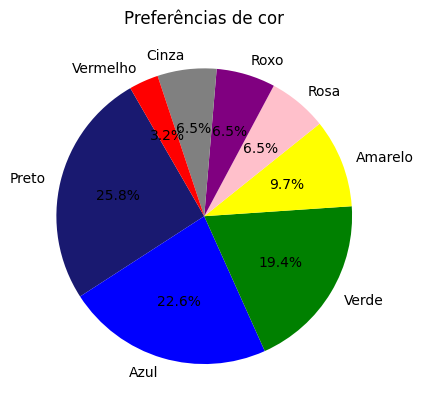

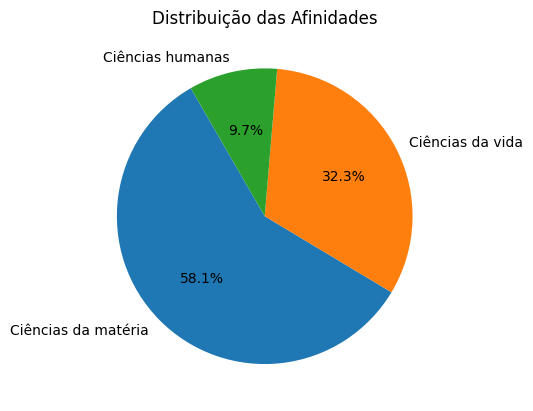

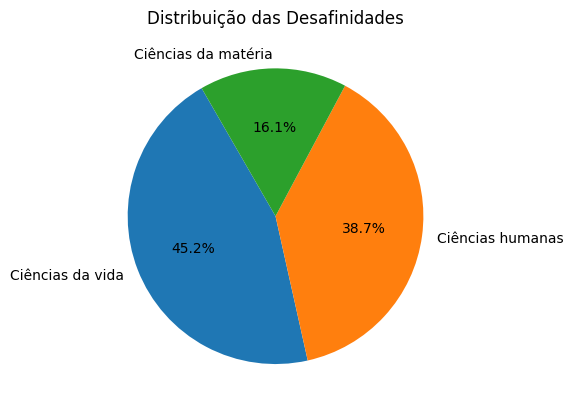

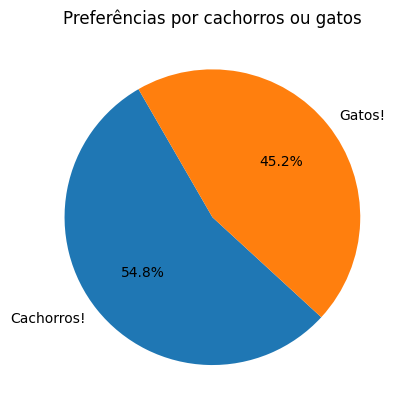

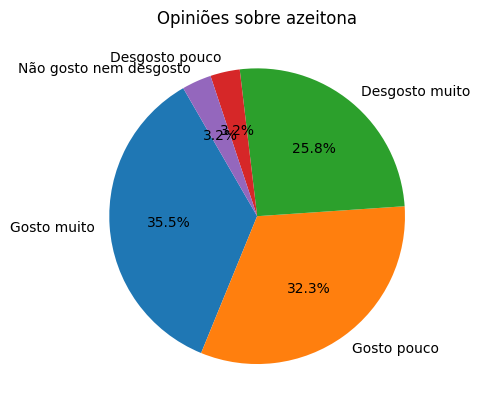

In [116]:
#tste
cores_counts = Tabela[cores].value_counts()
custom_colors = ['midnightblue','blue','green','yellow','pink','purple','gray','red']
plt.pie(cores_counts, labels=cores_counts.index, autopct='%1.1f%%', startangle=120,colors=custom_colors)
plt.title('Preferências de cor')
plt.show()

afinidades_counts = Tabela[afinidades].value_counts()
plt.pie(afinidades_counts, labels=afinidades_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribuição das Afinidades')
plt.show()

desafinidades_counts = Tabela[desafinidades].value_counts()
plt.pie(desafinidades_counts, labels=desafinidades_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribuição das Desafinidades')
plt.show()

cao_gato = Tabela[cats_dogs].value_counts()
plt.pie(cao_gato, labels=cao_gato.index, autopct='%1.1f%%', startangle=120)
plt.title('Preferências por cachorros ou gatos')
plt.show()

azeitona_counts = Tabela[opinioes_azeitona].value_counts()
plt.pie(azeitona_counts, labels=azeitona_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Opiniões sobre azeitona')
plt.show()


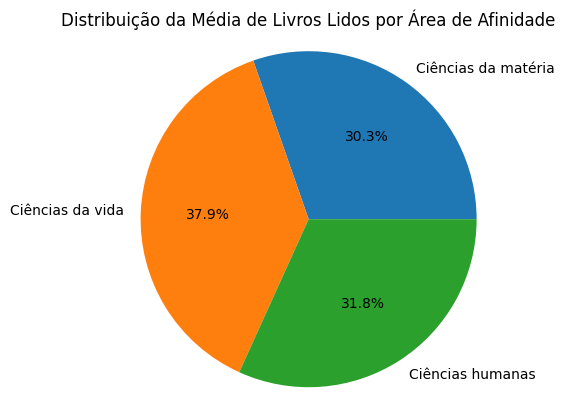

In [117]:
grafico = Tabela.groupby(afinidades)[livros_ano_passado].mean().reset_index()

plt.pie(grafico[livros_ano_passado], labels=grafico[afinidades], autopct='%1.1f%%')
plt.title('Distribuição da Média de Livros Lidos por Área de Afinidade')
plt.axis('equal')
plt.show()

## Resultado e discussão



 <h5> A partir dos métodos mostrados as seguintes determinaçãoes podem ser feitas com relação aos dados quantitativos:</h5>
 </br8>
 <h5>A altura média da amostra de alunos da turma 23 é de 170,21 centimetros, a mediana e a moda são ambas 170 cm e o desvio padrão da altura é 9,47 cm. Considerando a média do homem e da mulher brasileiro como sendo 175 e 162 cm, ainda não seria possível afirmar com certeza se a amostra da turma 23 estaria na média ou não por não se possuir dados sobre o género de quem respondeu ao questionário. Com relação a média do número do sapato o resultado foi 39,58, a moda e a mediana deram 40 e desvio padrão foi de 3,149. 
 Sobre o hábito de leitura dos alunos no último ano é possível concluir que a média de leitura dos alunos foi de  8,64 uma moda e uma mediana de 5 livros e um desvio padrão de 8,91. </h5>
 </br4>
 <h5>A partir da plotagem de gráticos de pizza para análise dos dados qualitativos, o seguinte foi notado:</h5> 
 <br8>
 <h5>A cor de preferência mais selecionada pelos ilum da amostra da turma 23 foi a cor preta, sendo cerca de 25,8% das respotas, seguida pela cor azul, que representou 22,6%. Mais da metada possui afinidade com ciências da matéria e cerca de 45,2 possuem desafinidade com ciência da vida. A orcentagem gostos por cães e gatos são semelhantes, mas a preferência ainda é por cães.  </h5>
                                               




## Referências

[1] First steps 2: Adding and customizing renderers. Disponível em: <https://docs.bokeh.org/en/latest/docs/first_steps/first_steps_2.html>. Acesso em: 12 ago. 2023.

[2] First steps 3: Adding legends, text, and annotations. Disponível em: <https://docs.bokeh.org/en/latest/docs/first_steps/first_steps_3.html#>. Acesso em: 12 ago. 2023.

[3] Robert Wadlow: o homem mais alto de todos os tempos. Disponível em: <https://www.guinnessworldrecords.com.br/records/hall-of-fame/robert-wadlow-tallest-man-ever#:~:text=Os%20g%C3%AAmeos%20ent%C3%A3o%20nomearam%20Robert>. Acesso em: 12 ago. 2023.

‌[4] Lista das pessoas mais baixas do mundo. Disponível em: <https://pt.wikipedia.org/wiki/Lista_das_pessoas_mais_baixas_do_mundo>. Acesso em: 12 ago. 2023.

‌[5] Jonathan Jacob Meijer. Disponível em: <https://en.wikipedia.org/wiki/Jonathan_Jacob_Meijer>. Acesso em: 12 ago. 2023.

‌[6] Python math.isnan() Method. Disponível em: <https://www.w3schools.com/python/ref_math_isnan.asp>. Acesso em: 12 ago. 2023.

‌[7] Pie charts — Matplotlib 3.7.2 documentation. Disponível em: <https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py>. Acesso em: 12 ago. 2023.

‌
‌
‌

Escreva nesta seção as referências consultadas.



## Playground

